In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
import warnings
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

First of all  we will add Data from csv file that we ahve already coverted from txt files to DataFrame for EDA and training our ML models.

In [129]:
Train_data=pd.read_csv('../input/amazon-ba/mycsvfile.csv')
Test_data=pd.read_csv('../input/amazon-ba/test.csv')

In [130]:
Train_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x20f7,BANGRES18DEL01,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,Windy,High,0,Buffet,motorcycle,2.0,No,Metropolitian,42.0
3,0x7804,HYDRES13DEL02,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,19.0
4,0x7faf,RANCHIRES07DEL01,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,Stormy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,25.0


In [131]:
Test_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian


We will use seaborn library for data Visualisation and Feature engineering 

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

We will use heatmap to see correlation between different features 

Here we can see a strong correlation between longitudes and latitudes of reataurant and delivery location

<AxesSubplot:>

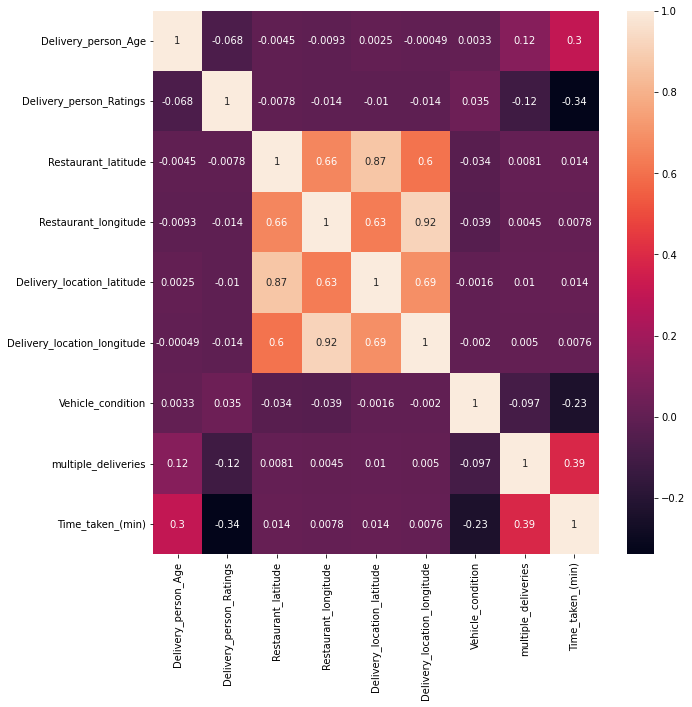

In [133]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(Train_data.corr(),annot=True,ax=ax)
#plt.show()

We are able to see that **Multiple_deliveries** , **Delivery_person_rating** and **Delivery_person_age** have the strong correlation with our target variable , So we have to give moe importance to these features 

We will add a new feature of Distance between restaraunt and delivery location
* Function to calculate distance using latitudes and longitudes

In [134]:
import haversine as hs

def distance(lat1,lon1,lat2,lon2):
    coord_1 = (lat1, lon1)
    coord_2 = (lat2, lon2)
    x = hs.haversine(coord_1,coord_2)
    return x

In [135]:
Distance_travelled=[]
for row in (Train_data.itertuples()):
    temp=distance(row.Restaurant_latitude,row.Restaurant_longitude,row.Delivery_location_latitude,row.Delivery_location_longitude)
    Distance_travelled.append(temp)

First we will join Test and Train data For proper EDA and Data Cleaning

In [136]:
Data=pd.concat([Train_data,Test_data])

In [137]:
Data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x20f7,BANGRES18DEL01,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,Windy,High,0,Buffet,motorcycle,2.0,No,Metropolitian,42.0
3,0x7804,HYDRES13DEL02,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,19.0
4,0x7faf,RANCHIRES07DEL01,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,Stormy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,25.0


New Feature **Distance_travelled** added sucessfully

In [138]:
for i in range(0,len(Distance_travelled)):
    if Distance_travelled[i]>13.76:
        Distance_travelled[i]=None

In [139]:
Data["Distance_travelled"]=pd.DataFrame(Distance_travelled)


In [140]:
Data.isnull().sum()

ID                                 0
Delivery_person_ID                 0
Delivery_person_Age             2345
Delivery_person_Ratings         2415
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Order_Date                         0
Time_Orderd                     2175
Time_Order_picked                  0
Weather_conditions               774
Road_traffic_density             755
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries             1231
Festival                         293
City                            1524
Time_taken_(min)               11399
Distance_travelled             14366
dtype: int64

In [141]:
Data["Distance_travelled"]=Data["Distance_travelled"].fillna(method="bfill",axis=0)


In [142]:
Data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_(min),Distance_travelled
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,...,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.025153
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,...,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,6.210873
2,0x20f7,BANGRES18DEL01,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,...,Windy,High,0,Buffet,motorcycle,2.0,No,Metropolitian,42.0,6.210873
3,0x7804,HYDRES13DEL02,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,...,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,19.0,3.073623
4,0x7faf,RANCHIRES07DEL01,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,...,Stormy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,25.0,10.564989


Now we will perform **PCA** over these 4 features to reduce them as they are showing strong correlation

In [143]:
Corr_Features=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"]

In [144]:
dc=pd.DataFrame(Data[Corr_Features])

In [145]:
dc.head()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.913041,77.683237,12.953041,77.723237
3,17.431477,78.400350,17.451477,78.420350
4,23.359407,85.325055,23.429407,85.395055


<AxesSubplot:>

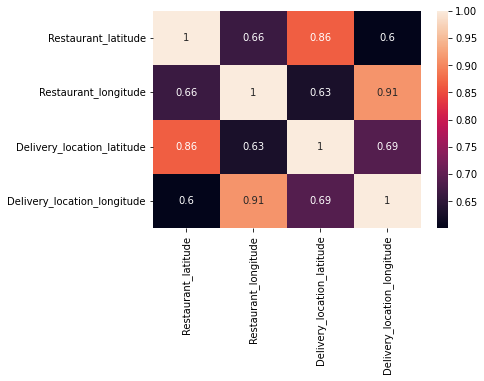

In [146]:
sns.heatmap(dc.corr(),annot=True)

For performing **PCA** first we will have to scale the variables

As we can see that after PCA our principle component contibutes for 80% and others barely 10% so we will remove other columns.

In [147]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
  
#Data["Distance_travelled"] = sc.fit_transform(Data["Distance_travelled"].values.reshape(-1, 1))

<AxesSubplot:>

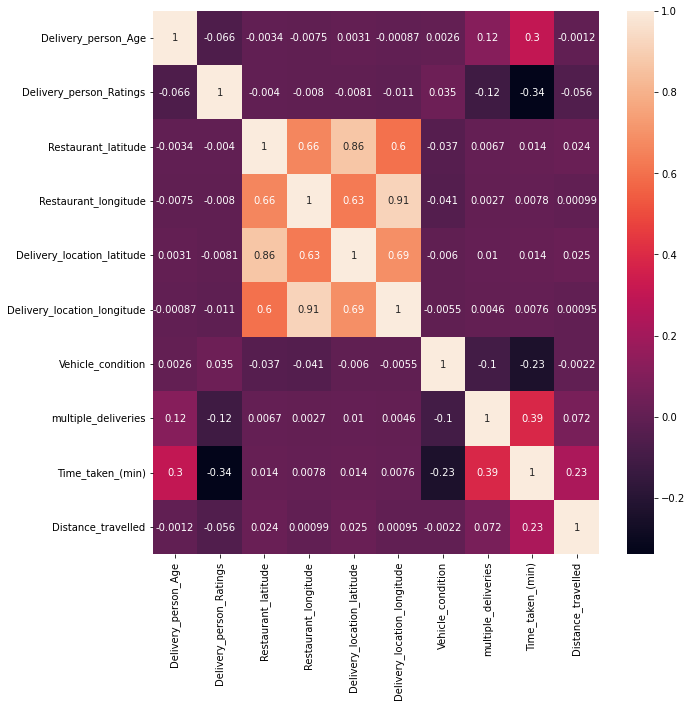

In [148]:

fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(Data.corr(),annot=True,ax=ax)

In [149]:
#Data.drop(Corr_Features,axis=1,inplace=True)
#Data.head()

In [150]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56992 entries, 0 to 11398
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          54647 non-null  float64
 3   Delivery_person_Ratings      54577 non-null  float64
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  54817 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weather_conditions           56218 non-null  object 
 12  Road_traffic_density         56237 non-null  object 
 13  Vehicle_conditio

In [151]:
Data.isnull().sum()

ID                                 0
Delivery_person_ID                 0
Delivery_person_Age             2345
Delivery_person_Ratings         2415
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Order_Date                         0
Time_Orderd                     2175
Time_Order_picked                  0
Weather_conditions               774
Road_traffic_density             755
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries             1231
Festival                         293
City                            1524
Time_taken_(min)               11399
Distance_travelled                 0
dtype: int64

Since ID and Delivery_person_ID are not useful for us so we will remove these variables

In [152]:
Data.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
Data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_(min),Distance_travelled
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.025153
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,6.210873
2,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,Windy,High,0,Buffet,motorcycle,2.0,No,Metropolitian,42.0,6.210873
3,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,19.0,3.073623
4,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,Stormy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,25.0,10.564989


Here we copy our **Data** in **d** so that if done any experiment then our data is safe

In [153]:
d=Data.copy()

Now we will handle missing values,as we can see that the three most important features have so many missing values.

In [154]:
d.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_(min),Distance_travelled
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.025153
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,6.210873
2,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,Windy,High,0,Buffet,motorcycle,2.0,No,Metropolitian,42.0,6.210873
3,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,19.0,3.073623
4,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,Stormy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,25.0,10.564989


In [155]:
d.isnull().sum()

Delivery_person_Age             2345
Delivery_person_Ratings         2415
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Order_Date                         0
Time_Orderd                     2175
Time_Order_picked                  0
Weather_conditions               774
Road_traffic_density             755
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries             1231
Festival                         293
City                            1524
Time_taken_(min)               11399
Distance_travelled                 0
dtype: int64

From the Graph below we can say that majority values of age comes between 20-40 ,but we donot have a normal distribution so replacing values with medain will not be a good idea , So we have to think for some other way.

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

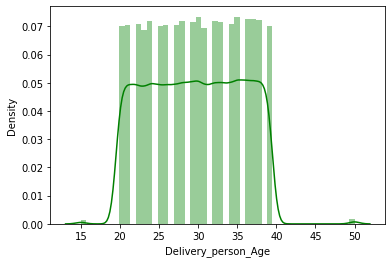

In [156]:
sns.distplot(d.Delivery_person_Age, kde = True, color = "g")

Here we can see that most data lies towards the median so we can replace missing values with median value.

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Density'>

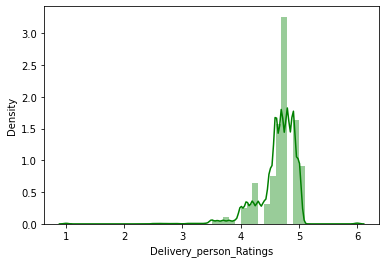

In [157]:
sns.distplot(d.Delivery_person_Ratings, kde = True, color = "g")

here we have bimodal curve so missing values can be 0 or 1 since 1 is have 40% of density so we can assume missing data to be =1 i.e median of the curve.

<AxesSubplot:xlabel='multiple_deliveries', ylabel='Density'>

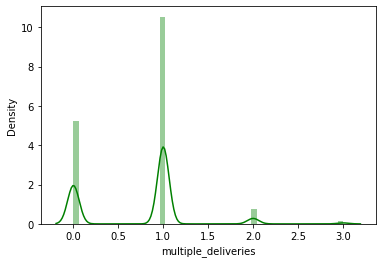

In [158]:
sns.distplot(d.multiple_deliveries, kde = True, color = "g")

In [159]:
d.reset_index(inplace=True)

Here we can see that

Here we can see that Delivery_person_age is increasing w.r.t Time Taken , so we can fill the missing values with respect to Time_taken_(min) feature. 

<AxesSubplot:xlabel='Time_taken_(min)', ylabel='Delivery_person_Age'>

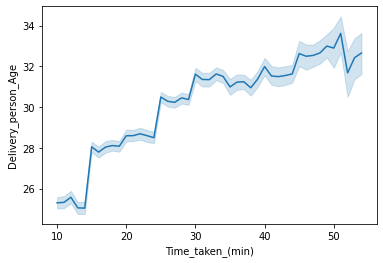

In [160]:
sns.lineplot(d["Time_taken_(min)"], d.Delivery_person_Age )

So we can fill missing values based on these trends as if Time_taken is 10-20 then age= 27, if time -> 20-30 then age=29, if time-> 30-40 then age 31 , if time>40 then age 33

In [161]:
for i in d["Time_taken_(min)"]:
    if (i>10 and i<20):
        d.Delivery_person_Age=d["Delivery_person_Age"].fillna(27)
    elif(i>=20 and i<30):
        d.Delivery_person_Age=d["Delivery_person_Age"].fillna(29)
    elif(i>=30and i<40):
        d.Delivery_person_Age=d["Delivery_person_Age"].fillna(31)

    elif(i=="NaN"):
        d.Delivery_person_Age=d["Delivery_person_Age"].fillna(d['Delivery_person_Age'].median())



        

Filling missing values with median for remaining two features.

In [162]:
d.Delivery_person_Ratings=d["Delivery_person_Ratings"].fillna(d['Delivery_person_Ratings'].median())

In [163]:
d.multiple_deliveries=d["multiple_deliveries"].fillna(method="bfill",axis=0)

In [164]:
d.Festival

0        No
1        No
2        No
3        No
4        No
         ..
56987    No
56988    No
56989    No
56990    No
56991    No
Name: Festival, Length: 56992, dtype: object

<AxesSubplot:xlabel='Festival', ylabel='count'>

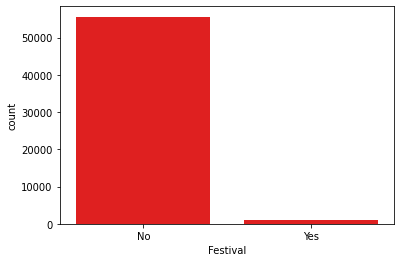

In [165]:
sns.countplot(x="Festival",data=d,color = "r")

In [166]:
d.Festival=d["Festival"].fillna(method="bfill",axis=0)

<AxesSubplot:xlabel='Road_traffic_density', ylabel='count'>

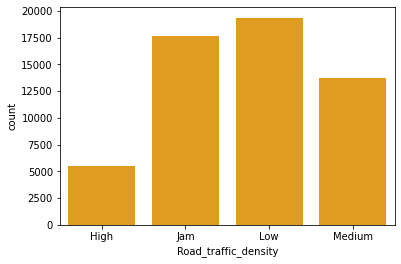

In [167]:
sns.countplot(x="Road_traffic_density",data=d,color = "orange")

In [168]:
d["Road_traffic_density"]=d["Road_traffic_density"].fillna(method="bfill",axis=0)

<AxesSubplot:xlabel='Weather_conditions', ylabel='count'>

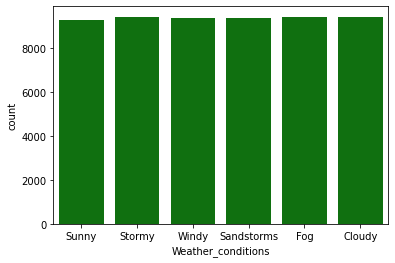

In [169]:
sns.countplot(x="Weather_conditions",data=d,color = "green")

In [170]:
d["Weather_conditions"]=d["Weather_conditions"].fillna(method="bfill",axis=0)

<AxesSubplot:xlabel='City', ylabel='count'>

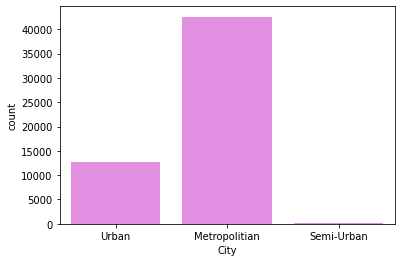

In [171]:
sns.countplot(x="City",data=d,color = "violet")

In [172]:
d["City"]=d["City"].fillna(method="bfill",axis=0)

In [173]:
d["City"].value_counts()

Metropolitian    43751
Urban            13027
Semi-Urban         214
Name: City, dtype: int64

Since there are so many  categorical features,so we can use encoding to get better understanding about the data

In [174]:
d.isna().sum()

index                              0
Delivery_person_Age                0
Delivery_person_Ratings            0
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Order_Date                         0
Time_Orderd                     2175
Time_Order_picked                  0
Weather_conditions                 0
Road_traffic_density               0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries                0
Festival                           0
City                               0
Time_taken_(min)               11399
Distance_travelled                 0
dtype: int64

In [175]:
d.head()

,index,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_(min),Distance_travelled
0,0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.025153
1,1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,6.210873
2,2,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,Windy,High,0,Buffet,motorcycle,2.0,No,Metropolitian,42.0,6.210873
3,3,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,Sandstorms,Low,1,Meal,scooter,1.0,No,Urban,19.0,3.073623
4,4,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,Stormy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,25.0,10.564989


In [176]:
d["latitude"]=d["Restaurant_latitude"]

In [177]:
#d.drop(Corr_Features,axis=1,inplace=True)

In [178]:
d.head()

,index,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken_(min),Distance_travelled,latitude
0,0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,...,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.025153,22.745049
1,1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,...,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,6.210873,12.913041
2,2,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,...,High,0,Buffet,motorcycle,2.0,No,Metropolitian,42.0,6.210873,12.913041
3,3,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,...,Low,1,Meal,scooter,1.0,No,Urban,19.0,3.073623,17.431477
4,4,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,...,Low,0,Meal,motorcycle,1.0,No,Metropolitian,25.0,10.564989,23.359407


In [179]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [180]:
d["Festival"]=lb_make.fit_transform(d["Festival"])
d["Road_traffic_density"]=lb_make.fit_transform(d["Road_traffic_density"])
d["Type_of_order"]=lb_make.fit_transform(d["Type_of_order"])
d["Type_of_vehicle"]=lb_make.fit_transform(d["Type_of_vehicle"])
d["Weather_conditions"]=lb_make.fit_transform(d["Weather_conditions"])
d["City"]=lb_make.fit_transform(d.City)

In [181]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        56992 non-null  int64  
 1   Delivery_person_Age          56992 non-null  float64
 2   Delivery_person_Ratings      56992 non-null  float64
 3   Restaurant_latitude          56992 non-null  float64
 4   Restaurant_longitude         56992 non-null  float64
 5   Delivery_location_latitude   56992 non-null  float64
 6   Delivery_location_longitude  56992 non-null  float64
 7   Order_Date                   56992 non-null  object 
 8   Time_Orderd                  54817 non-null  object 
 9   Time_Order_picked            56992 non-null  object 
 10  Weather_conditions           56992 non-null  int64  
 11  Road_traffic_density         56992 non-null  int64  
 12  Vehicle_condition            56992 non-null  int64  
 13  Type_of_order   

In [182]:
d.isnull().sum()

index                              0
Delivery_person_Age                0
Delivery_person_Ratings            0
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Order_Date                         0
Time_Orderd                     2175
Time_Order_picked                  0
Weather_conditions                 0
Road_traffic_density               0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries                0
Festival                           0
City                               0
Time_taken_(min)               11399
Distance_travelled                 0
latitude                           0
dtype: int64

<AxesSubplot:>

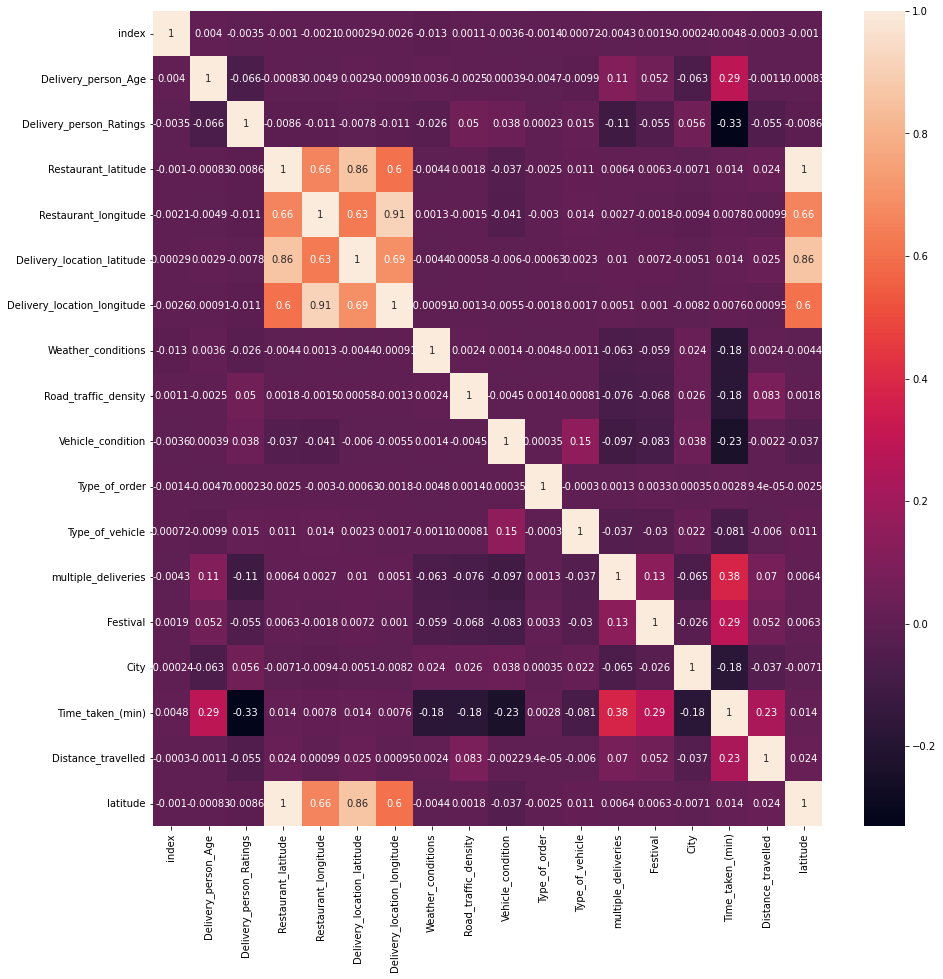

In [183]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(d.corr(),annot=True,ax=ax)

Here we will use time to data to creat a new feature.

In [184]:
d["Time_Orderd"]=d["Time_Orderd"].fillna(method="bfill",axis=0)

In [185]:
d[["hour_to", "minute_to"]] = d["Time_Orderd"].str.split(":", expand = True)

In [186]:
d[["hour_top", "minute_top"]] = d["Time_Order_picked"].str.split(":", expand = True)

In [187]:
def time(t1, t2,t3, t4):
    x=t1*60*60 + t2*60
    y=t3*60*60 + t4*60
    return y-x

In [188]:
d['hour_to'] = d['hour_to'].astype(float)
d['hour_top'] = d['hour_top'].astype(float)
d['minute_to'] = d['minute_to'].astype(float)
d['minute_top'] = d['minute_top'].astype(float)

In [189]:
Time_required=[]
for row in (d.itertuples()):
    temp=time(row.hour_to,row.minute_to,row.hour_top,row.minute_top)
    Time_required.append(temp)

In [190]:
d["time_in_picking"]=Time_required

In [191]:
d.head()

,index,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Festival,City,Time_taken_(min),Distance_travelled,latitude,hour_to,minute_to,hour_top,minute_top,time_in_picking
0,0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,...,0,2,24.0,3.025153,22.745049,11.0,30.0,11.0,45.0,900.0
1,1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,...,0,0,33.0,6.210873,12.913041,19.0,45.0,19.0,50.0,300.0
2,2,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,...,0,0,42.0,6.210873,12.913041,13.0,50.0,13.0,55.0,300.0
3,3,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,...,0,2,19.0,3.073623,17.431477,10.0,60.0,11.0,15.0,900.0
4,4,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,...,0,0,25.0,10.564989,23.359407,23.0,50.0,23.0,60.0,600.0


In [192]:
d["time_in_picking"].value_counts()

 300.0      18330
 900.0      18313
 600.0      18214
 0.0           28
-1200.0        25
            ...  
-51300.0        1
-19200.0        1
-48900.0        1
 48900.0        1
-26100.0        1
Name: time_in_picking, Length: 350, dtype: int64

In [193]:
d.isna().sum()

index                              0
Delivery_person_Age                0
Delivery_person_Ratings            0
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Order_Date                         0
Time_Orderd                        0
Time_Order_picked                  0
Weather_conditions                 0
Road_traffic_density               0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries                0
Festival                           0
City                               0
Time_taken_(min)               11399
Distance_travelled                 0
latitude                           0
hour_to                            0
minute_to                          0
hour_top                           0
minute_top                         0
time_in_picking                    0
dtype: int64

In [194]:
d.head()

,index,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Festival,City,Time_taken_(min),Distance_travelled,latitude,hour_to,minute_to,hour_top,minute_top,time_in_picking
0,0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,...,0,2,24.0,3.025153,22.745049,11.0,30.0,11.0,45.0,900.0
1,1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,...,0,0,33.0,6.210873,12.913041,19.0,45.0,19.0,50.0,300.0
2,2,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,...,0,0,42.0,6.210873,12.913041,13.0,50.0,13.0,55.0,300.0
3,3,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,...,0,2,19.0,3.073623,17.431477,10.0,60.0,11.0,15.0,900.0
4,4,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,...,0,0,25.0,10.564989,23.359407,23.0,50.0,23.0,60.0,600.0


In [195]:
d["Time_ordered(sec)"]=d["hour_to"]*60*60 + d["minute_to"]*60

In [196]:
d.head()

,index,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,City,Time_taken_(min),Distance_travelled,latitude,hour_to,minute_to,hour_top,minute_top,time_in_picking,Time_ordered(sec)
0,0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,...,2,24.0,3.025153,22.745049,11.0,30.0,11.0,45.0,900.0,41400.0
1,1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,...,0,33.0,6.210873,12.913041,19.0,45.0,19.0,50.0,300.0,71100.0
2,2,37.0,4.4,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,...,0,42.0,6.210873,12.913041,13.0,50.0,13.0,55.0,300.0,49800.0
3,3,28.0,4.9,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,...,2,19.0,3.073623,17.431477,10.0,60.0,11.0,15.0,900.0,39600.0
4,4,37.0,4.6,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,...,0,25.0,10.564989,23.359407,23.0,50.0,23.0,60.0,600.0,85800.0


In [197]:
d.drop("Time_Orderd",axis=1,inplace=True)

We will also devide the date feature into 3 features i.e Day ,Month and Year

In [198]:
d[["day", "month", "year"]] = d["Order_Date"].str.split("-", expand = True)

In [199]:
d['day'] = d['day'].astype(float)
d['month'] = d['month'].astype(float)
d['year'] = d['year'].astype(float)

In [200]:
d.drop(["Order_Date","Time_Order_picked","year"],axis=1,inplace=True)

In [201]:
d.head()

,index,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,...,Distance_travelled,latitude,hour_to,minute_to,hour_top,minute_top,time_in_picking,Time_ordered(sec),day,month
0,0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,...,3.025153,22.745049,11.0,30.0,11.0,45.0,900.0,41400.0,19.0,3.0
1,1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,...,6.210873,12.913041,19.0,45.0,19.0,50.0,300.0,71100.0,25.0,3.0
2,2,37.0,4.4,12.913041,77.683237,12.953041,77.723237,5,0,0,...,6.210873,12.913041,13.0,50.0,13.0,55.0,300.0,49800.0,19.0,3.0
3,3,28.0,4.9,17.431477,78.400350,17.451477,78.420350,2,2,1,...,3.073623,17.431477,10.0,60.0,11.0,15.0,900.0,39600.0,7.0,3.0
4,4,37.0,4.6,23.359407,85.325055,23.429407,85.395055,3,2,0,...,10.564989,23.359407,23.0,50.0,23.0,60.0,600.0,85800.0,18.0,3.0


In [202]:
d.day.value_counts()

3.0     2880
1.0     2880
5.0     2880
13.0    2640
11.0    2640
15.0    2640
17.0    2640
4.0     2440
2.0     2440
6.0     2440
18.0    2298
16.0    2298
14.0    2298
12.0    2298
9.0     1440
21.0    1440
30.0    1440
19.0    1440
28.0    1440
24.0    1440
26.0    1440
7.0     1440
8.0     1220
25.0    1220
31.0    1220
10.0    1220
29.0    1220
23.0    1220
20.0    1220
27.0    1220
Name: day, dtype: int64

<AxesSubplot:>

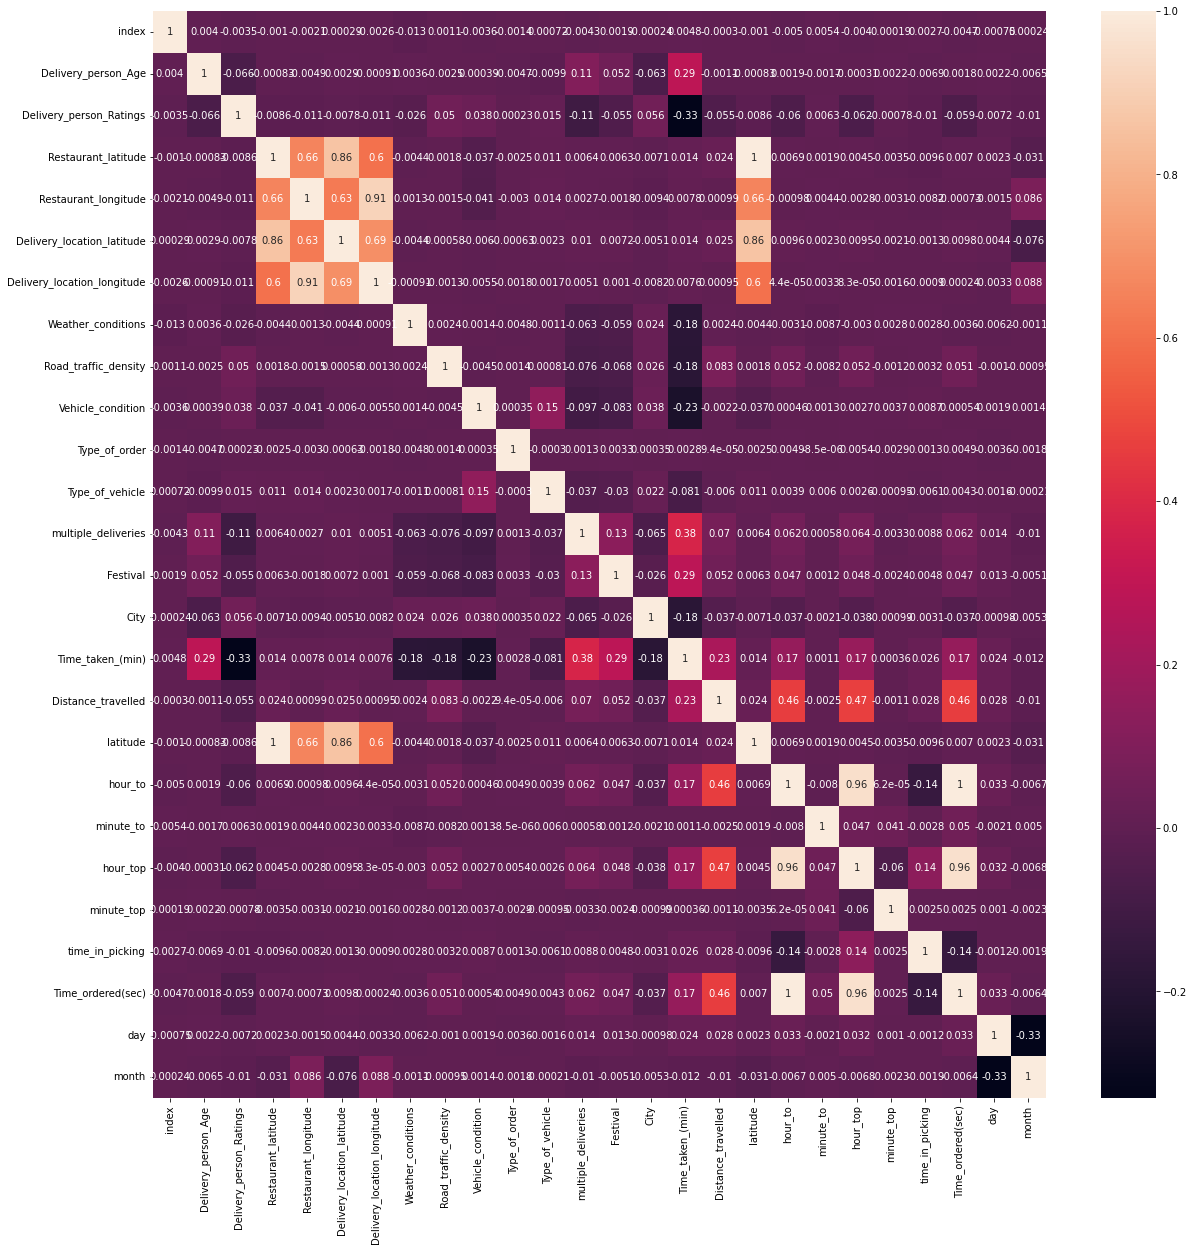

In [203]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(d.corr(),annot=True,ax=ax)

In [204]:
d.isnull().sum()

index                              0
Delivery_person_Age                0
Delivery_person_Ratings            0
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Weather_conditions                 0
Road_traffic_density               0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries                0
Festival                           0
City                               0
Time_taken_(min)               11399
Distance_travelled                 0
latitude                           0
hour_to                            0
minute_to                          0
hour_top                           0
minute_top                         0
time_in_picking                    0
Time_ordered(sec)                  0
day                                0
month                              0
dtype: int64

In [205]:
d.drop(["index","hour_to","minute_to","hour_top","minute_top"],axis=1,inplace=True)

In [206]:
d.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken_(min),Distance_travelled,latitude,time_in_picking,Time_ordered(sec),day,month
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,0.0,0,2,24.0,3.025153,22.745049,900.0,41400.0,19.0,3.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,1.0,0,0,33.0,6.210873,12.913041,300.0,71100.0,25.0,3.0
2,37.0,4.4,12.913041,77.683237,12.953041,77.723237,5,0,0,0,...,2.0,0,0,42.0,6.210873,12.913041,300.0,49800.0,19.0,3.0
3,28.0,4.9,17.431477,78.400350,17.451477,78.420350,2,2,1,2,...,1.0,0,2,19.0,3.073623,17.431477,900.0,39600.0,7.0,3.0
4,37.0,4.6,23.359407,85.325055,23.429407,85.395055,3,2,0,2,...,1.0,0,0,25.0,10.564989,23.359407,600.0,85800.0,18.0,3.0


In [207]:
d["latitude"]=d["latitude"].round(2)
d["Distance_travelled"]=d["Distance_travelled"].round(2)

In [208]:
df=d.copy()

In [209]:
d.Distance_travelled.median()

7.56

In [210]:
d.Distance_travelled.describe()

count    56992.000000
mean         7.218695
std          3.702459
min          1.470000
25%          4.470000
50%          7.560000
75%         10.600000
max         13.740000
Name: Distance_travelled, dtype: float64

In [211]:
#d.drop(["Distance_travelled"],axis=1,inplace=True)

In [212]:
for i in d.Distance_travelled:
    if i>13.76:
        d.Distance_travelled[i]="NaN"


In [213]:
d.Distance_travelled.describe()

count    56992.000000
mean         7.218695
std          3.702459
min          1.470000
25%          4.470000
50%          7.560000
75%         10.600000
max         13.740000
Name: Distance_travelled, dtype: float64

In [214]:
d1=d.iloc[:45593,:]
d2=d.iloc[45593:,:]

In [215]:
target=d1["Time_taken_(min)"]

In [216]:
d1.drop("Time_taken_(min)",axis=1,inplace=True)
d2.drop("Time_taken_(min)",axis=1,inplace=True)

In [217]:
train_data=d1.copy()
test_data=d2.copy()

In [219]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, target, test_size=0.25, random_state=42)

**GridSearch_CV**

**XGBOOST**

In [220]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(x_train, y_train)

[05:50:49] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [221]:
pred=xgb_r.predict(x_test)

In [222]:
from sklearn.metrics import r2_score

score=100*(r2_score(y_test, pred))

In [223]:
score

74.03946263756612

**RandomForestRegressor**

In [224]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
regr = RandomForestRegressor(max_depth=10,n_estimators=50,bootstrap= True,max_features='auto', random_state=42)

In [226]:
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [227]:
pred2=regr.predict(x_test)

In [228]:
from sklearn.metrics import r2_score
score=100*(r2_score(y_test, pred2))
score

76.67420836086826

**Grid Search** for RF

In [229]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, 25,None], 'max_features': ['auto', 'log2'], 'n_estimators': [20,30,50,60,70,80]}

In [230]:
#g_search = GridSearchCV(estimator = regr, param_grid = param_grid, 

                          #cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)


In [231]:
#g_search.fit(x_train, y_train)

#print(g_search.best_params_)
#g_search.score(x_train, y_train)

#g_search.score(x_test, y_test)

**Decision Tree Regressor**

In [232]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=100,random_state = 42)

In [233]:
regressor.fit(x_train, y_train)
pred3=regressor.predict(x_test)

In [234]:
score=100*(r2_score(y_test,pred3))
score

57.84912246771672

**Gradient Boosting Algorithm**

In [235]:
from sklearn import  ensemble
reg = ensemble.GradientBoostingRegressor()

In [236]:
reg.fit(x_train, y_train)
pred4=reg.predict(x_test)

In [237]:
score=100*(r2_score(y_test, pred4))
score

73.10658663530616

Using **Random Forest Regressor** We are getting the predictions , so we will use RFR for final prediction.

In [241]:
test_data.time_in_picking.value_counts()

 900.0      3692
 600.0      3656
 300.0      3615
 0.0          10
-1500.0        6
            ... 
 11400.0       1
-34800.0       1
 48300.0       1
-16800.0       1
-13200.0       1
Name: time_in_picking, Length: 221, dtype: int64

In [242]:
pred=regr.predict(test_data)
pred2=xgb_r.predict(test_data)

In [245]:
pred=pd.DataFrame(pred)
pred2=pd.DataFrame(pred2)

In [249]:
y=Test_data["ID"]
X=Test_data["ID"]
X=pd.DataFrame(X)
y=pd.DataFrame(y)



In [253]:
y["Time_taken (min)"]=pred[0]
X["Time_taken (min)"]=pred2[0]

In [256]:
y.to_csv('Final--Submission.csv',index=False)

In [257]:
X.to_csv('Final-Submission.csv',index=False)